In [1]:
import seagul.envs
import ray
import ray.rllib.agents.ars as ars
from ray.tune.logger import pretty_print
import tensorflow as tf
import time
from tqdm import trange
from ray import tune

from ray.tune.registry import register_env
from seagul.envs.mujoco.five_link import FiveLinkWalkerEnv

env_name = "Walker2d-v2"

###
def env_creator(env_config):
    return FiveLinkWalkerEnv()  # return an env instance

register_env("five_link-v3", env_creator)
###

ray.init()
config = ars.DEFAULT_CONFIG.copy()
config["num_gpus"] = 0
config["num_workers"] = 15
config["eager"] = False
config["model"]["fcnet_hiddens"] = []
config['observation_filter'] = 'MeanStdFilter'

trainer = ars.ARSTrainer(config=config, env=env_name)
# Can optionally call trainer.restore(path) to load a checkpoint.
for i in trange(1):
   # Perform one iteration of training the policy with ARS
    result = trainer.train()
    
checkpoint = trainer.save()
print("checkpoint saved at", checkpoint)
print(pretty_print(result))
ray.shutdown()

/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sgillen/miniconda3/envs/ray/lib/python3.6/s

(pid=3784) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=3784)   _np_qint8 = np.dtype([("qint8", np.int8, 1)])
(pid=3784) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=3784)   _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
(pid=3784) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=3784)   _np_qint16 = np.dtype([("qint16"

100%|██████████| 1/1 [00:04<00:00,  4.53s/it]

checkpoint saved at /home/sgillen/ray_results/ARS_Walker2d-v2_2019-11-06_18-06-30skojb7_5/checkpoint_1/checkpoint-1
date: 2019-11-06_18-06-43
done: false
episode_len_mean: 101.0
episode_reward_mean: 86.65026092529297
experiment_id: 6e7f36d5ee204b56a03503ec0d23bad9
hostname: sgdt
info:
  episodes_so_far: 60
  episodes_this_iter: 60
  grad_norm: 8.973780632019043
  update_ratio: 1.2229595184326172
  weights_norm: 0.001310529187321663
  weights_std: 0.0034607185516506433
iterations_since_restore: 1
node_ip: 192.168.0.12
perf:
  cpu_util_percent: 69.78571428571429
  gpu_util_percent0: 0.12857142857142856
  ram_util_percent: 69.95714285714287
  vram_util_percent0: 0.13283950617283954
pid: 3680
time_since_restore: 4.531215190887451
time_this_iter_s: 4.531215190887451
time_total_s: 4.531215190887451
timestamp: 1573092403
timesteps_since_restore: 3098
timesteps_this_iter: 3098
timesteps_total: 3098
training_iteration: 1



In [ ]:
import numpy as np
trainer.policy.compute(np.random.randn(13))



In [9]:
import seagul.envs
import ray
import ray.rllib.agents.ars as ars
from ray.tune.logger import pretty_print
import tensorflow as tf


from ray.tune.registry import register_env
from seagul.envs.mujoco.five_link import FiveLinkWalkerEnv

def env_creator(env_config):
    return FiveLinkWalkerEnv()  # return an env instance
register_env("five_link-v3", env_creator)


env_name = "Walker2d-v3"

ray.init()
config = ars.DEFAULT_CONFIG.copy()
config["num_gpus"] = 0
config["num_workers"] = 1
config["eager"] = False
trainer = ars.ARSTrainer(config=config, env=env_name)

#trainer.load("/Users/sgillen/ray_results/ARS_five_link-v3_2019-10-21_14-02-55lwgccrp3/checkpoint_10/checkpoint-10") 
#trainer.restore("/Users/sgillen/ray_results/ARS_five_link-v3_2019-10-21_14-02-55lwgccrp3/checkpoint_10/checkpoint-10")
trainer.restore("~/ray_results/ARS/ARS_Walker2d-v3_0_seed=0_2019-11-06_13-11-120yfwk5tw/")

2019-11-06 18:06:08,801	INFO resource_spec.py:205 -- Starting Ray with 3.08 GiB memory available for workers and up to 1.55 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2019-11-06 18:06:09,220	INFO trainer.py:344 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2019-11-06 18:06:09,402	INFO ars.py:184 -- Creating shared noise table.
2019-11-06 18:06:17,052	ERROR import_thread.py:89 -- ImportThread: Connection closed by server.
2019-11-06 18:06:17,072	ERROR worker.py:1681 -- print_logs: Connection closed by server.
2019-11-06 18:06:17,072	ERROR worker.py:1781 -- listen_error_messages_raylet: Connection closed by server.


KeyboardInterrupt: 

Creating window glfw
57.5345399818074


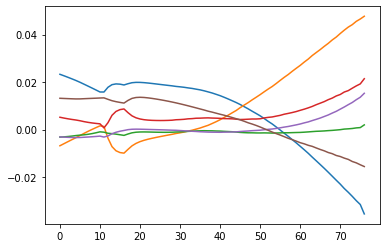

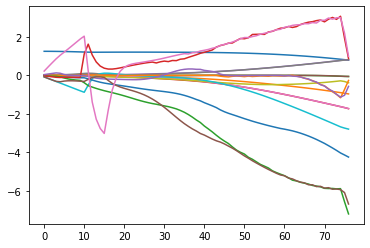

In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make(env_name)
obs = env.reset()

action_hist = []
state_hist  = []
reward_hist = []

done = False
while not done:
    actions = trainer.compute_action(obs.flatten())
    obs, reward, done, _ = env.step(np.asarray(actions))
    env.render()
    action_hist.append(np.copy(np.clip(actions, -10, 10)))
    state_hist.append(np.copy(obs))
    reward_hist.append(np.copy(reward))
    if done:
        break


print(sum(reward_hist))
plt.plot(action_hist)
plt.figure()
plt.plot(state_hist)